In [67]:
import numpy as np

In [68]:
import pandas as pd

In [69]:
pip install kagglehub[pandas-datasets]

In [70]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Churn_Modelling.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rjmanoj/credit-card-customer-churn-prediction",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-4217267378.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'credit-card-customer-churn-prediction' dataset.
First 5 records:    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88  

In [71]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [72]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [74]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


### One Hot Encoding

In [75]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
#Categorical (text) columns -> numeric columns

In [76]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [77]:
'''make sure every value should scale 


you can see high values differ in balance & in estimated salary 
so jo weight ka value he jo vo jyda converge nahi hoota 
so make sure that model builing ke vakt sari values scale kardo 


'''

'make sure every value should scale \n\n\nyou can see high values differ in balance & in estimated salary \nso jo weight ka value he jo vo jyda converge nahi hoota \nso make sure that model builing ke vakt sari values scale kardo \n\n\n'

In [78]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
X_train.shape

(8000, 11)

### Standard Scalling

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)

'''
fit() -> learn statistics from the data(ex: mean,sd for standard scaler,min&max for minmaxscaler)
transform() -> use those learned statistics to scale data

'''
x_test_scaled = scaler.transform(X_test)

'''
scaler.fit_transform(X_test)  # ❌ wrong
You’d be letting the model “peek” at the test data distribution — even if it’s just statistics.
That’s called data leakage, and it makes evaluation results unrealistically good.
'''
#doing transform only to avoid data leakage.


''''Why we only transform() the test set
The test set is supposed to simulate new, unseen data in the real world.
So we:

Learn scaling rules from training data
Apply the same rules to test data
This keeps things fair and realistic.'''

"'Why we only transform() the test set\nThe test set is supposed to simulate new, unseen data in the real world.\nSo we:\n\nLearn scaling rules from training data\nApply the same rules to test data\nThis keeps things fair and realistic."

In [81]:
x_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [82]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [83]:
## making sequential model

In [84]:
model = Sequential()

In [85]:
'''1 input layer, 1 hidden layer, 1 output layer'''

'1 input layer, 1 hidden layer, 1 output layer'

In [86]:
model.add(Dense(3,activation='relu',input_dim=11))
#relu gives better results 

#2nd hidden layer
model.add(Dense(11,activation='relu'))


#creating dense layer
#that hidden layer connected with input layer so mention 11 (bcoz of having 11 columns) 


model.add(Dense(1,activation='sigmoid'))
#output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

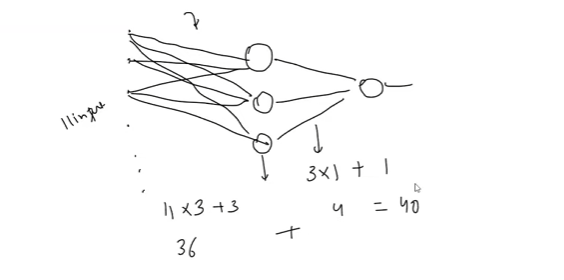

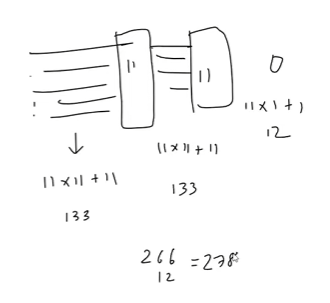

In [88]:
'''doing compilcation of model 
in that telling konsa loss function, optimizer for gradient descent which?
'''

'doing compilcation of model \nin that telling konsa loss function, optimizer for gradient descent which?\n'

In [89]:
#our problem is binary classication so 
#loss function -> log loss 
#metrics -> accuracy for seeing accuracy every epoch
model.compile(loss= 'binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [102]:
import matplotlib.pyplot as plt

In [108]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)
#make dict of output 
#validation split-> 8k me se 6k train and 2k test

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8672 - loss: 0.3246 - val_accuracy: 0.8556 - val_loss: 0.3620
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.3395 - val_accuracy: 0.8600 - val_loss: 0.3602
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8608 - loss: 0.3281 - val_accuracy: 0.8581 - val_loss: 0.3597
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8536 - loss: 0.3500 - val_accuracy: 0.8575 - val_loss: 0.3617
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3384 - val_accuracy: 0.8575 - val_loss: 0.3599
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8596 - loss: 0.3353 - val_accuracy: 0.8606 - val_loss: 0.3595
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3358 - val_accuracy: 0.8594 - val_loss: 0.3608
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8651 - loss: 0.3250 - val_accu

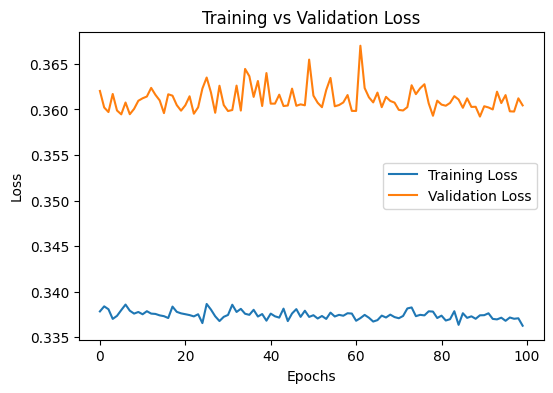

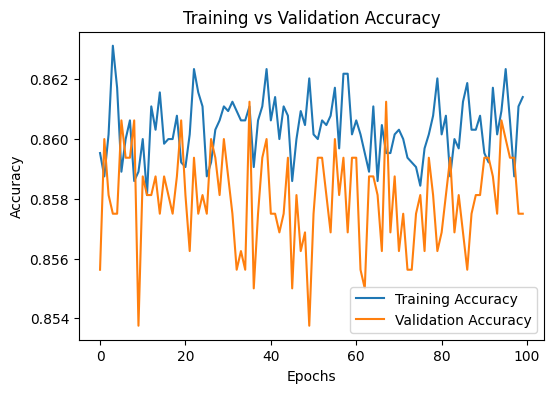

'if training los and validation loss have high gap so => [overfitting]\n    Model learns training data very well\n    Fails to generalize to new (validation) data\n    \nTraining loss ≈ Validation loss (SMALL GAP)\n\nMeaning: ✅ Good fit / good generalization'

In [ ]:
import matplotlib.pyplot as plt

# -------- Figure 1: Loss --------
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# -------- Figure 2: Accuracy --------
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

'''if training los and validation loss have high gap so => [overfitting]
    Model learns training data very well
    Fails to generalize to new (validation) data
    
    can reduce via dropout, regularlization


Training loss ≈ Validation loss (SMALL GAP)

Meaning: ✅ Good fit / good generalization'''

In [97]:
'''for knowing layer 0 & 1 weights & baises'''
print("--"*30)
print(model.layers[0].get_weights())
print("--"*30)
print(model.layers[1].get_weights())

------------------------------------------------------------
[array([[ 0.06326046, -0.01174427, -0.09291482],
       [-1.0173644 , -0.2923062 ,  0.34139165],
       [ 0.02847736, -0.00164071,  0.00435801],
       [-0.11944148, -0.36532333, -0.49102104],
       [-0.5684177 , -1.4223564 , -0.7137162 ],
       [-0.01295574, -0.01131252,  0.030083  ],
       [-0.3489358 , -0.0840705 ,  0.84415466],
       [ 0.04290027,  0.06238938,  0.04342771],
       [-0.01488499,  0.17090775,  0.12867847],
       [-0.05618421, -0.01183412,  0.08733509],
       [ 0.02912885,  0.01635011,  0.22458784]], dtype=float32), array([1.5415694 , 0.34423414, 1.0900006 ], dtype=float32)]
------------------------------------------------------------
[array([[ 1.0951962 ,  0.51289016,  0.01452929, -0.03321228, -0.8909277 ,
         0.2871999 ,  0.29648516,  1.0406723 ,  0.40687928,  0.55058944,
         0.10166674],
       [-0.41437653, -0.43226257,  0.2981769 , -0.81223804,  0.97468776,
         0.49897262,  0.601147

In [98]:
y_log = model.predict(x_test_scaled)

'''our output in 0 to 1,not o or 1 bcoz of using sigmoid function

so converting 0 or 1 probability  using threshold 

for check best threshold -> ROC,AUC

'''

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


'our output in 0 to 1,not o or 1 bcoz of using sigmoid function\n\nso converting 0 or 1 probability  using threshold \n\nfor check best threshold -> ROC,AUC\n\n'

In [99]:
y_pred = np.where(y_log>0.5,1,0)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8605

In [95]:
'''

for increasing accu

* can increase ephoc
* can use relu
* hidden layer ke number of nodes badha dow 
* can increase number of layers (not too much otherwise overfit)


'''

'\n\nfor increasing accu\n\n* can increase ephoc\n* can use relu\n* hidden layer ke number of nodes badha dow \n* can increase number of layers (not too much otherwise overfit)\n\n\n'